In [7]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt

## MLR

In [22]:
df = pd.read_csv('data.csv')
df

,Miles Traveled (X1),Num Deliveries (X2),Travel Time (hrs) (Y)
0,89,4,7.0
1,66,1,5.4
2,78,3,6.6
3,111,6,7.4
4,44,1,4.8
5,77,3,6.4
6,80,3,7.0
7,66,2,5.6
8,109,5,7.3
9,76,3,6.4


In [23]:
labels = {"X1": "Miles Traveled (X1)",  "X2": "Num Deliveries (X2)", "Y": "Travel Time (hrs) (Y)"}

In [24]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
model=linear_model.LinearRegression().fit(x,y)
print(model.coef_,model.intercept_,model.score(x,y))

[0.02622257 0.18404052] 3.73215813168261 0.871399502997586


In [12]:
x1_mean = np.mean(df[labels["X1"]])
x2_mean = np.mean(df[labels["X2"]])
y_mean = np.mean(df[labels["Y"]])

df["X1"] = df[labels["X1"]] - x1_mean
df["X2"] = df[labels["X2"]] - x2_mean
df["Y"] = df[labels["Y"]] - y_mean

df["X1_sqr"] = df["X1"] ** 2
df["X2_sqr"] = df["X2"] ** 2
df["X1_Y"] = df["X1"] * df["Y"]
df["X2_Y"] = df["X2"] * df["Y"]
df["X1_X2"] = df["X1"] * df["X2"]

df

,SNO,Miles Traveled (X1),Num Deliveries (X2),Travel Time (hrs) (Y),X1,X2,Y,X1_sqr,X2_sqr,X1_Y,X2_Y,X1_X2
0,1,89,4,7.0,9.4,0.9,0.61,88.36,0.81,5.734,0.549,8.46
1,2,66,1,5.4,-13.6,-2.1,-0.99,184.96,4.41,13.464,2.079,28.56
2,3,78,3,6.6,-1.6,-0.1,0.21,2.56,0.01,-0.336,-0.021,0.16
3,4,111,6,7.4,31.4,2.9,1.01,985.96,8.41,31.714,2.929,91.06
4,5,44,1,4.8,-35.6,-2.1,-1.59,1267.36,4.41,56.604,3.339,74.76
5,6,77,3,6.4,-2.6,-0.1,0.01,6.76,0.01,-0.026,-0.001,0.26
6,7,80,3,7.0,0.4,-0.1,0.61,0.16,0.01,0.244,-0.061,-0.04
7,8,66,2,5.6,-13.6,-1.1,-0.79,184.96,1.21,10.744,0.869,14.96
8,9,109,5,7.3,29.4,1.9,0.91,864.36,3.61,26.754,1.729,55.86
9,10,76,3,6.4,-3.6,-0.1,0.01,12.96,0.01,-0.036,-0.001,0.36


In [13]:
sum_x1_sqr = sum(df["X1_sqr"])
sum_x2_sqr = sum(df["X2_sqr"])
sum_x1_y = sum(df["X1_Y"])
sum_x2_y = sum(df["X2_Y"])
sum_x1_x2 = sum(df["X1_X2"])
sqr_sum_x1_x2 = sum_x1_x2 ** 2

In [14]:
b1 = (sum_x2_sqr * sum_x1_y - sum_x1_x2 * sum_x2_y) / (sum_x1_sqr * sum_x2_sqr - sqr_sum_x1_x2)
b2 = (sum_x1_sqr * sum_x2_y - sum_x1_x2 * sum_x1_y) / (sum_x2_sqr * sum_x1_sqr - sqr_sum_x1_x2)

In [15]:
b1

0.026222566122678717

In [16]:
b2

0.18404051772650482

In [17]:

b1_x1_mean = b1 * x1_mean
b2_x2_mean = b2 * x2_mean
b0 = y_mean - b1_x1_mean - b2_x2_mean
b0

3.732158131682608

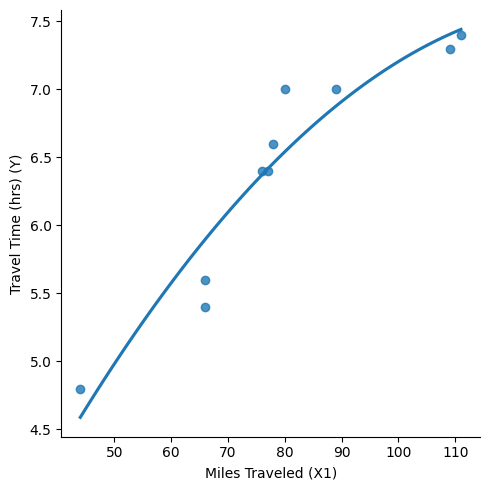

In [26]:
sns.lmplot(x = labels['X1'], y = labels['Y'], data = df, order = 2, ci = None)
plt.show()

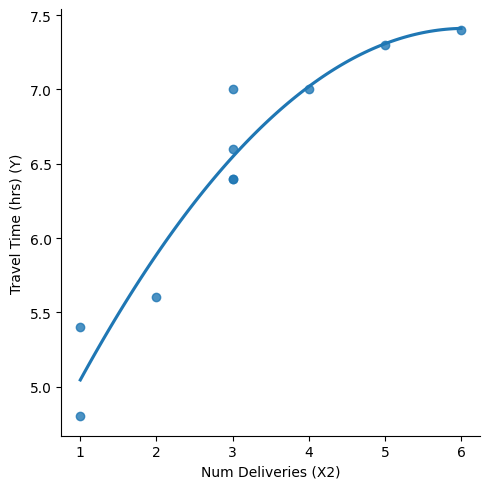

In [27]:
sns.lmplot(x = labels['X2'], y = labels['Y'], data = df, order = 2, ci = None)
plt.show()

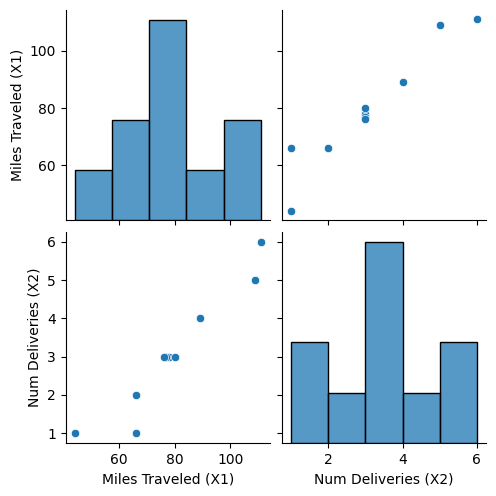

In [29]:
x = df.drop(labels['Y'],axis =1)
sns.pairplot(x)
plt.show()

## SLR

In [2]:
slr_df = pd.read_csv("slr.csv")
slr_df

,Hours Studied,Grade on Exam
0,2,69
1,9,98
2,5,82
3,5,77
4,3,71
5,7,84
6,1,55
7,8,94
8,6,84
9,2,64


In [3]:
xbar = np.mean(slr_df["Hours Studied"])
ybar = np.mean(slr_df["Grade on Exam"])
slr_df["xi-xbar"] = slr_df["Hours Studied"] - xbar
slr_df["yi-ybar"] = slr_df["Grade on Exam"] - ybar
slr_df["xi-xbar_sqr"] = slr_df["xi-xbar"] ** 2
slr_df["mul_xi-xbar_yi-ybar"] = slr_df["xi-xbar"] * slr_df["yi-ybar"]
num = sum(slr_df["mul_xi-xbar_yi-ybar"])
denom = sum(slr_df["xi-xbar_sqr"])

b1 = num / denom
b0 = ybar - b1 * xbar

In [4]:
b1

4.742603550295859

In [5]:
b0

55.035502958579876

In [8]:
df = pd.read_csv("slr.csv", delimiter=",")

x=df.iloc[:,:-1]
y=df.iloc[:,-1]

model=linear_model.LinearRegression().fit(x,y)
print(model.coef_,model.intercept_,model.score(x,y))

[4.74260355] 55.03550295857988 0.9505368205956815


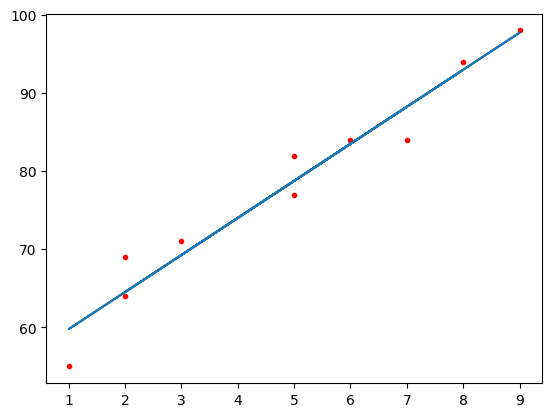

In [9]:
plt.plot(x,y,"r.")
plt.plot(x,model.predict(x))